**Задание 1**
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metric


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
data = boston["data"]
data.shape

(506, 13)

In [4]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
target = boston["target"]
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [7]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [15]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [16]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280
...,...,...,...
441,17.1,17.403672,0.303672
23,14.5,13.385941,-1.114059
225,50.0,39.983425,-10.016575
433,14.3,16.682863,2.382863


In [17]:
mse1 = (check_test["error"] ** 2).mean()

mse1

21.51744423117739

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["y_pred"], check_test["y_test"])

21.51744423117739

In [19]:
(np.abs(check_test["error"])).mean()

3.162709871457423

In [20]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(check_test["y_pred"], check_test["y_test"])

3.162709871457423

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7112260057484908

In [22]:
lr.intercept_

array([31.63108404])

In [23]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [24]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

In [1]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.title('Коэффициенты LR')
plt.show()

NameError: name 'plt' is not defined

In [26]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_train_scaled, X_test_scaled

(         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 0   -0.414259 -0.505125 -1.292142 -0.281546 -0.851085  0.145264 -0.365584   
 1   -0.402008 -0.505125 -0.162083 -0.281546 -0.087967 -0.208401  0.133941   
 2   -0.397211 -0.505125 -0.609489 -0.281546 -0.936828 -0.896237 -1.266900   
 3   -0.290936 -0.505125 -0.431970 -0.281546 -0.165136 -0.543965 -1.429789   
 4    1.457816 -0.505125  1.005500 -0.281546  0.194987 -0.556496  0.079645   
 ..        ...       ...       ...       ...       ...       ...       ...   
 349 -0.397237 -0.505125 -0.371354 -0.281546 -0.319475 -0.681810  0.836171   
 350 -0.381828  0.380752 -0.602272 -0.281546 -0.799639 -0.653963 -0.966462   
 351 -0.416046  3.038382 -1.316677 -0.281546 -1.048295  0.430702 -1.415310   
 352  0.926113 -0.505125  1.005500 -0.281546  1.566884  0.422348  0.933904   
 353 -0.390305 -0.505125 -0.371354 -0.281546 -0.319475  0.110454  0.600888   
 
           DIS       RAD       TAX   PTRATIO         B     LST

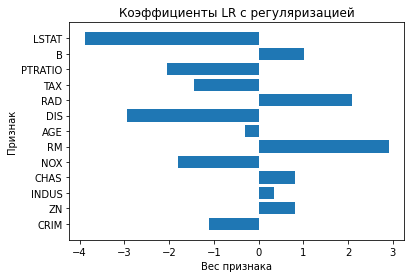

In [29]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.title('Коэффициенты LR с регуляризацией')
plt.show()

In [30]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [31]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred = lr.predict(X_test_scaled.loc[:, important_features])

mse2 = mean_squared_error(y_test, y_pred)

print("mse до: {}".format(mse1))
print("mse после: {}".format(mse2))

mse до: 21.51744423117739
mse после: 23.850685901073575


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6799128298280104

**Задание 2**
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)
model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)

In [35]:
check_RFR = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_RFR.head(10)

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [36]:
check_RFR["error"] = check_RFR["y_pred"] - check_RFR["y_test"]

check_RFR

,y_test,y_pred,error
173,23.6,22.806412,-0.793588
274,32.4,31.131464,-1.268536
491,13.6,16.339125,2.739125
72,22.8,23.810726,1.010726
452,16.1,17.139521,1.039521
...,...,...,...
441,17.1,13.521640,-3.578360
23,14.5,15.112621,0.612621
225,50.0,42.808700,-7.191300
433,14.3,15.586103,1.286103


In [37]:
mse3 = mean_squared_error(y_test, y_pred)
mse3

9.334548946165196

In [38]:
mean_absolute_error(check_RFR["y_pred"], check_RFR["y_test"])

2.0831253879090608

In [39]:
r2_score(y_test, y_pred)

0.87472606157312

**Вывод:** Модель, построенная на основе RandomForestRegression даёт по сравнению с обученной Линейной Регрессией  больший коэффициент r2_score (коэффициент детерминации) 0.8747 против 0.71 у обученной Линейной Регрессии и 0.6799 у Линейной Регрессии с регуляризацией, а значит модель RFR дает значительно лучшие предсказания, чем обычная Линейная Регрессия и Линейная Регрессия с регуляризацией.
.......................................................................................

**Задание 3**
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [41]:
for name, importance in zip(X_train[feature_names], model.feature_importances_):
...     print(name, "=", importance)

CRIM = 0.03167574073875602
ZN = 0.0015425166262328857
INDUS = 0.007138131415845557
CHAS = 0.0012362448947738866
NOX = 0.0142689698753483
RM = 0.4026817857034993
AGE = 0.014298644996729816
DIS = 0.06397256527230023
RAD = 0.00528121831288784
TAX = 0.011524934553144586
PTRATIO = 0.018081076405025417
B = 0.012450853014007697
LSTAT = 0.4158473181914483


In [57]:
Summa_Coef = sum(model.feature_importances_)
Summa_Coef

1.0

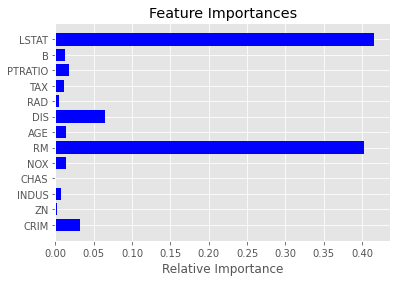

In [55]:
features = X_train[feature_names]
importances = model.feature_importances_
indices = np.argsort(importances)

plt.style.use('ggplot')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[:], color='b', align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')

plt.show()

Два признака с наибольшими коэффициентами - это LSTAT (0.4158473181914483) и RM (0.4026817857034993).